In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import yfinance as yf
from sklearn.preprocessing import scale
import os

In [3]:
df = pd.read_csv('covid-19.csv')
start_date = '2020-01-01'
end_date = '2020-06-30'
start_period = '2020-01-30'
end_period = '2020-05-10'

df['Date'] = pd.to_datetime(df['Date'])
mask = (df['Date'] >= pd.Timestamp(start_date)) & (df['Date'] <= pd.Timestamp(end_date))
df = df.loc[mask]

df['Taiwan_Daily'] = df['Taiwan_Accumulate'].diff().fillna(0)

Index = yf.download('^TWII', start=start_date, end=end_date)
Index.index.name = None
Index['Date'] = Index.index

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [1, 1]}, sharex=True)

ax2 = ax1.twinx()
ax1.plot(df['Date'], df['Taiwan_Daily'], color='salmon', label='Total Confirmed Cases', linewidth=4)
ax1.set_ylim(0, )
ax1.set_ylabel("Daily Confirmed Cases", fontsize=18, fontweight='bold', color='salmon')
ax1.set_yticklabels([f'{int(x):,}' for x in ax1.get_yticks()], size=14, weight='bold', color='salmon')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2.bar(df['Date'], df['Taiwan_Accumulate'], color='royalblue', label='Daily Confirmed Cases', linewidth=4, width=0.3)
ax2.set_ylabel("Total Confirmed Cases", fontsize=16, fontweight='bold', color='royalblue')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax2.set_yticklabels([f'{int(x):,}' for x in ax2.get_yticks()], size=14, weight='bold', color='royalblue')

ax3.plot(Index['Date'], Index['Close'], color='black', label='TWSE Index', linewidth=2)
ax3.set_ylabel("TAIEX", fontsize=18, fontweight='bold', color='black')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_yticklabels([f'{int(x):,}' for x in ax3.get_yticks()], size=14, weight='bold', color='black')
ax3.set_xticklabels([x.get_text() for x in ax3.get_xticklabels()], size=14, weight='bold')

for ax in [ax1, ax3]:
    ax.axvspan(pd.Timestamp(start_period), pd.Timestamp(end_period), color='grey', alpha=0.3)


plt.tight_layout()
# plt.savefig('Events/First_Covid.png', dpi=144, transparent=True)
plt.close()

[*********************100%%**********************]  1 of 1 completed


/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_22842/2481587861.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f'{int(x):,}' for x in ax1.get_yticks()], size=14, weight='bold', color='salmon')
/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_22842/2481587861.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f'{int(x):,}' for x in ax2.get_yticks()], size=14, weight='bold', color='royalblue')
/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_22842/2481587861.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels([f'{int(x):,}' for x in ax3.get_yticks()], size=14, weight='bold', color='black')
/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/i

50elefin_63
[*********************100%%**********************]  1 of 1 completed


/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_22842/803634515.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f'{int(x):,}' for x in ax1.get_yticks()], size=14, weight='bold')
/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_22842/803634515.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f'{int(x):,}' for x in ax2.get_yticks()], size=14, weight='bold', color='black')
/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_22842/803634515.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([x.get_text() for x in ax2.get_xticklabels()], size=14, weight='bold')


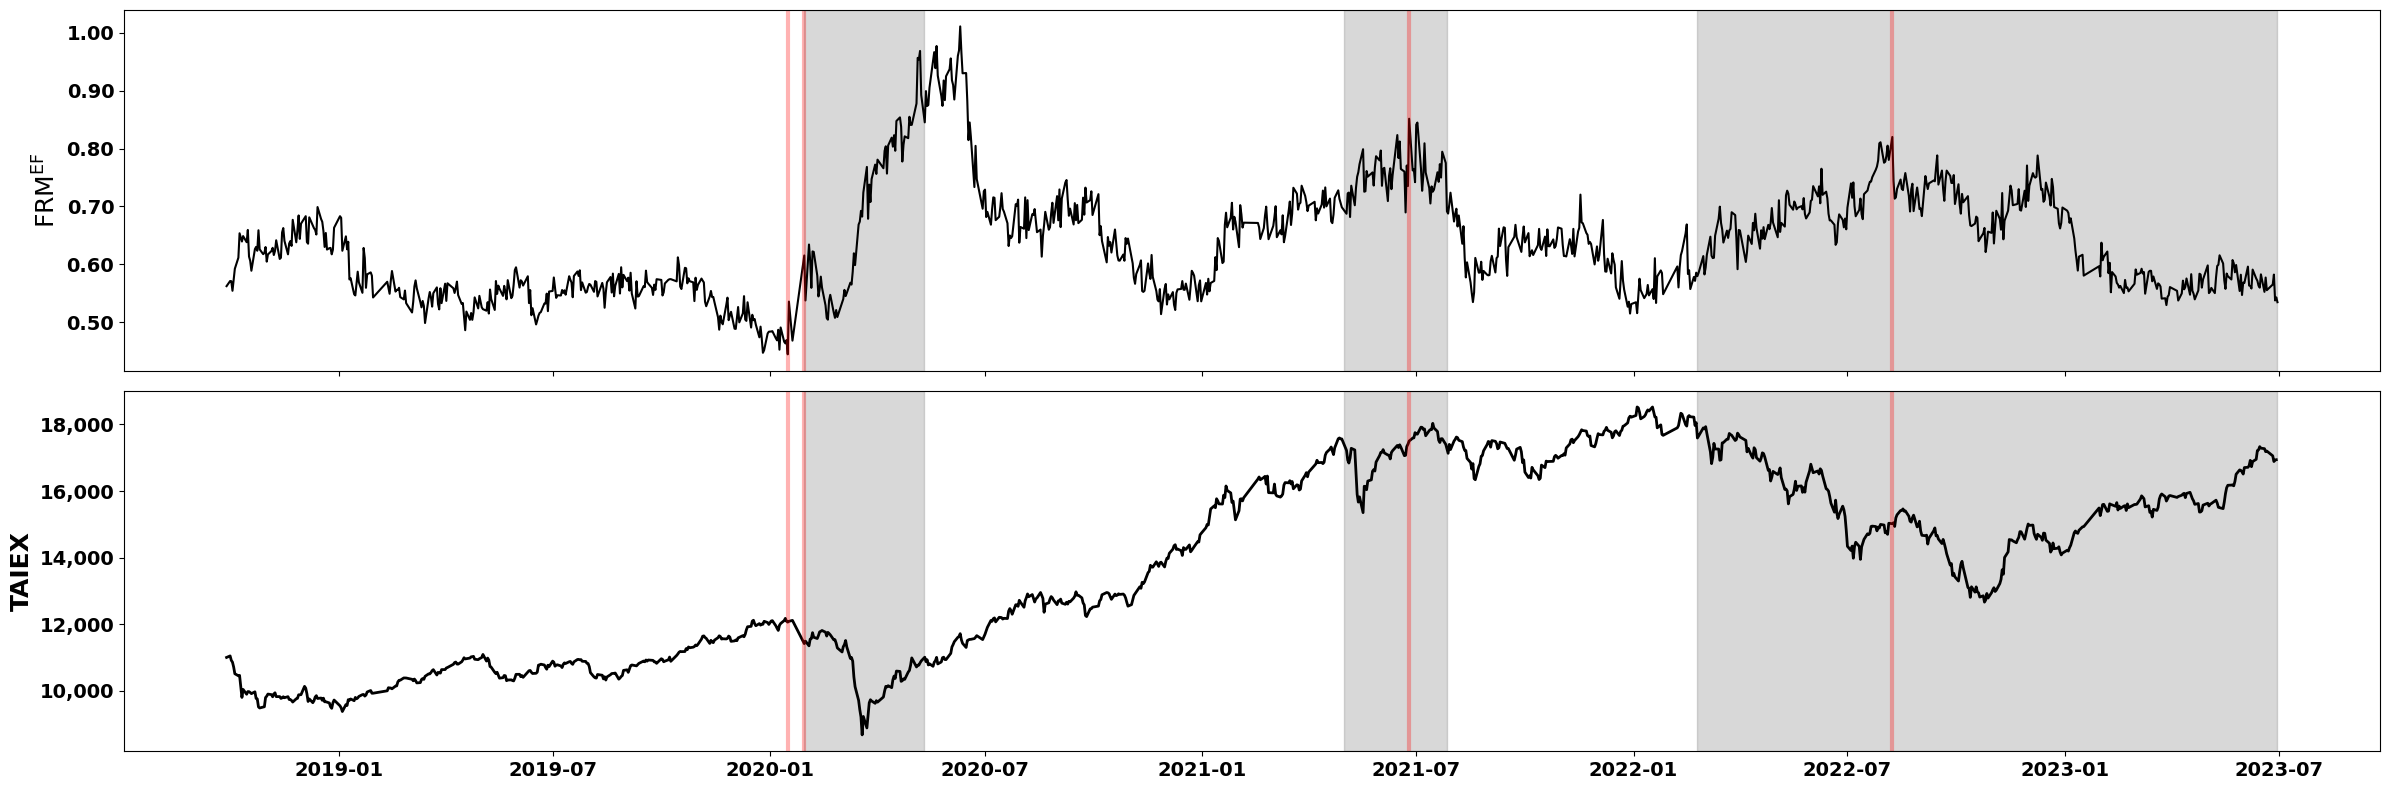

In [45]:
dir_list = [item for item in os.listdir(os.getcwd()) if os.path.isdir(item)]
dir_list = ['50elefin_63']
for dir_name in dir_list:
    #####

    folder = dir_name
    company = folder.split('_')[0]
    ncol_xx0 = int(folder.split('_')[0][:2])
    ws = int(folder.split('_')[1])

    #####

    print(folder)
    company_choose = {}
    company_choose['25ele'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2303', '3711', '3045', '2395', '3231', '2301', '3008', '2345', '2357', '3037', '3034', '4904', '2327', '4938', '2408', '2379', '3661', '3443', '2376']
    company_choose['25fin'] = ['2881', '2882', '2886', '2891', '2884', '5880', '2892', '2885', '2880', '2887', '2890', '2883', '2801', '2888', '2834', '2812', '2838', '2845', '2809', '2889', '6005', '2855', '2897', '2867', '2849']
    company_choose['50cap'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2881', '6505', '2882', '2303', '2886', '1303', '1301', '2891', '3711', '1216', '2002', '2884', '5880', '2207', '2892', '1326', '3045', '2885', '2395', '3231', '5871', '2301', '3008', '2880', '2345', '2912', '2357', '3037', '3034', '2603', '1101', '4904', '2887', '2327', '2890', '4938', '2408', '2379', '2883', '1590', '3661', '2801', '3443', '9910']
    company_choose['50elefin'] = ['2330', '2317', '2454', '2382', '2412', '2308', '2303', '3711', '3045', '2395', '3231', '2301', '3008', '2345', '2357', '3037', '3034', '4904', '2327', '4938', '2408', '2379', '3661', '3443', '2376', '2881', '2882', '2886', '2891', '2884', '5880', '2892', '2885', '2880', '2887', '2890', '2883', '2801', '2888', '2834', '2812', '2838', '2845', '2809', '2889', '6005', '2855', '2897', '2867', '2849']

    Taiwan = company_choose[company]


    data = pd.read_csv(f'../00 Raw Data/{company}.csv', parse_dates=['Date'], index_col='Date').rename_axis(None, axis=0)
    macro = pd.read_csv('../00 Raw Data/macro_return.csv', parse_dates=['Date'], index_col='Date').rename_axis(None, axis=0)

    xx0 = data.drop(columns=data.columns[0])
    xx0 = scale(xx0)

    m = macro.drop(columns=macro.columns[0])
    m = scale(m)

    full_lambda = np.zeros((xx0.shape[0] - ws, ncol_xx0))

    for j in range(ncol_xx0):
        lambda_firm = pd.read_csv(f"../02 Modeling/{folder}/lambda_l_{j + 1}.csv")
        full_lambda[:, j] = lambda_firm.iloc[:, 1].to_numpy()

    full_lambda = pd.DataFrame(full_lambda)
    full_lambda.index = data.index[ws:]
    full_lambda.columns = Taiwan

    average_lambda = np.sum(full_lambda, axis=1) / xx0.shape[1]
    average_lambda_df = pd.DataFrame({'FRM': average_lambda})

    period = data.index
    average_lambda_df.index = period[ws:]

    start_date = full_lambda.index[0]
    end_date = full_lambda.index[-1]

    Index = yf.download('^TWII', start=start_date, end=end_date)
    Index.index.name = None
    Index['Date'] = Index.index


    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 8), gridspec_kw={'height_ratios': [1, 1]}, sharex=True)

    ax1.plot(average_lambda.index, average_lambda, color='k', linewidth=1.5, label='FRM')
    ax1.set_ylabel(r"$\text{FRM}^\text{EF}$", fontsize=18, fontweight='bold')
    ax1.set_yticklabels([f'{int(x):,}' for x in ax1.get_yticks()], size=14, weight='bold')
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.2f}'))

    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    ax2.plot(Index['Date'], Index['Close'], color='black', label='TWSE Index', linewidth=2)
    ax2.set_ylabel("TAIEX", fontsize=18, fontweight='bold', color='black')
    ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.set_yticklabels([f'{int(x):,}' for x in ax2.get_yticks()], size=14, weight='bold', color='black')
    ax2.set_xticklabels([x.get_text() for x in ax2.get_xticklabels()], size=14, weight='bold')

    for ax in [ax1, ax2]:
        start_period = '2020-01-30'
        end_period = '2020-05-10'
        ax.axvspan(pd.Timestamp(start_period), pd.Timestamp(end_period), color='grey', alpha=0.3)

        start_period = '2021-05-01'
        end_period = '2021-07-27'
        ax.axvspan(pd.Timestamp(start_period), pd.Timestamp(end_period), color='grey', alpha=0.3)

        start_period = '2022-02-24'
        end_period = '2023-06-30'
        ax.axvspan(pd.Timestamp(start_period), pd.Timestamp(end_period), color='grey', alpha=0.3)

        special_date = '2020-01-16'
        ax.axvline(pd.Timestamp(special_date), color='red', linewidth=3, alpha=0.3)

        special_date = '2020-01-30'
        ax.axvline(pd.Timestamp(special_date), color='red', linewidth=3, alpha=0.3)

        special_date = '2021-06-25'
        ax.axvline(pd.Timestamp(special_date), color='red', linewidth=3, alpha=0.3)

        special_date = '2022-08-08'
        ax.axvline(pd.Timestamp(special_date), color='red', linewidth=3, alpha=0.3)

    plt.tight_layout()
    plt.savefig('FRM_TAIEX.png', dpi=144, transparent=True)
    plt.show()

    plt.figure(figsize=(15,8))
    plt.plot(average_lambda.index, average_lambda, color='k', linewidth=1, label='FRM')
    plt.xticks(ticks=["2019-01-02", "2019-07-01", "2020-01-02", "2020-07-01", "2021-01-04", "2021-07-01", "2022-01-03", "2022-07-01", "2023-01-03", "2023-06-30"], 
            labels=['2019', '', '2020', '', '2021', '', '2022', '', '2023', ''], fontsize=16, fontweight='heavy')
    plt.yticks(fontsize=16, fontweight='heavy')

    start_period = '2020-01-30'
    end_period = '2020-05-10'
    plt.axvspan(pd.Timestamp(start_period), pd.Timestamp(end_period), color='grey', alpha=0.3)

    start_period = '2021-05-01'
    end_period = '2021-07-27'
    plt.axvspan(pd.Timestamp(start_period), pd.Timestamp(end_period), color='grey', alpha=0.3)

    start_period = '2022-02-24'
    end_period = '2023-06-30'
    plt.axvspan(pd.Timestamp(start_period), pd.Timestamp(end_period), color='grey', alpha=0.3)

    plt.xlabel('')
    # plt.ylabel('FRM@Taiwan', fontsize=14, fontweight='bold')
    # plt.savefig(f'{folder}/FRM_Taiwan_{company}_{ws}.png', transparent=True, dpi=144)
    plt.close()

In [39]:
ax2.get_yticks()

array([ 8000., 10000., 12000., 14000., 16000., 18000., 20000.])